In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
nutrition_drink = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Chapters/19-Storytelling/Case_study/Starbucks -Case_study/starbucks-menu-nutrition-drinks.csv')

In [3]:
drink_menu = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Chapters/19-Storytelling/Case_study/Starbucks -Case_study/starbucks_drinkMenu_expanded.csv')

In this Case study I want to answer questions like the folowings:

1.Which Starbucks drink has the highest calories from the dataset?

2. Which drink has the highest calories from the Starbucks espresso drinks?

3. Highest Sugar Drink at Starbucks?

4. Which drink has the most calories from the Starbucks Tea Drinks drinks?

6. Espresso Drinks vs Tea Drinks calories

See if there is any correlation between features.


In [4]:
drink_menu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [5]:
drink_menu.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

We have just 1 null value for Caffeine, let's check how the Caffeine values looks like and clean data.

In [6]:
drink_menu['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

So, we have presence of object values, and let's change it for numbers and change the type to float for future study. 

In [7]:
drink_menu['Caffeine (mg)'] = drink_menu['Caffeine (mg)'].replace(['varies', 'Varies', 'nan'], 0)

drink_menu['Caffeine (mg)'] = drink_menu['Caffeine (mg)'].replace([np.nan], 0)

drink_menu['Caffeine (mg)'] = drink_menu['Caffeine (mg)'].astype(int)

Let's take off symbols of some columns values and clean it for future analysis. 

In [8]:
drink_menu[' Total Fat (g)'] = drink_menu[' Total Fat (g)'].replace(['3 2'], 32)

drink_menu[' Total Fat (g)'] = drink_menu[' Total Fat (g)'].astype(float)

drink_menu['Vitamin A (% DV) '] = drink_menu['Vitamin A (% DV) '].str.replace(r'\D', '')
drink_menu['Vitamin A (% DV) '] = drink_menu['Vitamin A (% DV) '].astype(float)

drink_menu['Vitamin C (% DV)'] = drink_menu['Vitamin C (% DV)'].str.replace(r'\D', '')
drink_menu['Vitamin C (% DV)'] = drink_menu['Vitamin C (% DV)'].astype(float)

drink_menu[' Calcium (% DV) '] = drink_menu[' Calcium (% DV) '].str.replace(r'\D', '')
drink_menu[' Calcium (% DV) '] = drink_menu[' Calcium (% DV) '].astype(float)

drink_menu['Iron (% DV) '] = drink_menu['Iron (% DV) '].str.replace(r'\D', '')
drink_menu['Iron (% DV) '] = drink_menu['Iron (% DV) '].astype(float)

In [9]:
drink_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    float64

### Now that we clean the data let's check which category have mayor options on the menu.

In [10]:
beverage_count = pd.DataFrame(drink_menu['Beverage_category'].value_counts())
beverage_count = beverage_count.reset_index()
beverage_count.columns = ['Category','Amounts of drinks']
beverage_count.head()

,Category,Amounts of drinks
0,Classic Espresso Drinks,58
1,Tazo® Tea Drinks,52
2,Signature Espresso Drinks,40
3,Frappuccino® Blended Coffee,36
4,Shaken Iced Beverages,18


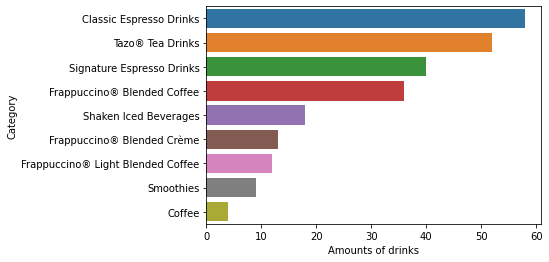

In [11]:
sns.barplot(x= 'Amounts of drinks', y= 'Category', data= beverage_count)


Classic Espresso Drinks and Tazo Tea drinks categories have the most options on the menu. Let's just focus on this 2 categories, let's check in each category what beverage have the most calories, sugars and caffeine. Then let's compare both categories.

In [12]:
top_high_calories = drink_menu[['Beverage_category', 'Calories']].sort_values('Calories', ascending= False)
top_high_calories.head(10)

,Beverage_category,Calories
84,Signature Espresso Drinks,510
215,Frappuccino® Blended Coffee,460
85,Signature Espresso Drinks,460
83,Signature Espresso Drinks,450
128,Tazo® Tea Drinks,450
216,Frappuccino® Blended Coffee,430
214,Frappuccino® Blended Coffee,420
81,Signature Espresso Drinks,400
129,Tazo® Tea Drinks,390
197,Frappuccino® Blended Coffee,390


In [13]:
top_high_calories['Beverage_category'].unique()

array(['Signature Espresso Drinks', 'Frappuccino® Blended Coffee',
       'Tazo® Tea Drinks', 'Frappuccino® Blended Crème',
       'Classic Espresso Drinks', 'Smoothies',
       'Frappuccino® Light Blended Coffee', 'Shaken Iced Beverages',
       'Coffee'], dtype=object)

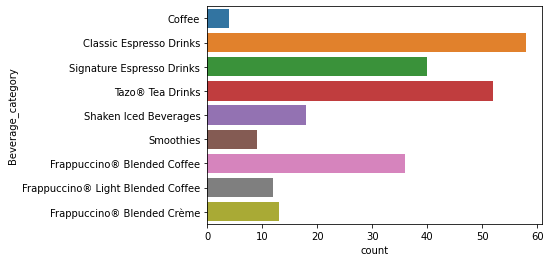

In [14]:
sns.countplot(y= 'Beverage_category', data= drink_menu)

Classic Espresso drinks is the category with the most variaty of beverage in Starbucks Menu compare to the other ones. Tazo tea drinks is the second one with the vast majority. We are going to study this 2 categories and compare them through the study. 
 

In [39]:
top_high_calories_espresso = drink_menu[['Beverage_category', 'Beverage','Calories']].sort_values(
    'Calories', ascending= False
)
top_high_calories_espresso  = top_high_calories_espresso[top_high_calories_espresso['Beverage_category'] == 'Signature Espresso Drinks']
top_high_calories_espresso.head()

,Beverage_category,Beverage,Calories
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),510
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),460
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),450
81,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),400
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),380


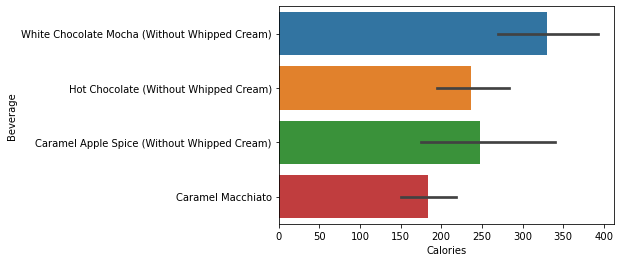

In [40]:
sns.barplot(x= 'Calories', y= 'Beverage', data= top_high_calories_espresso)

In [17]:
top_high_calories_signature = drink_menu[drink_menu['Beverage_category'] == ''

,Beverage_category,Beverage,Calories


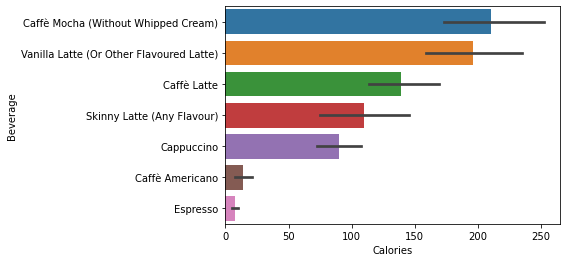

In [18]:
sns.barplot(x= 'Calories', y= 'Beverage', data= top_high_calories_espresso)

## Q2- Highest Sugar Drink at Espresso Starbucks?

In [19]:
top_high_sugar_drink = drink_menu[['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories', ' Sugars (g)']].sort_values(' Sugars (g)', ascending= False)
top_high_sugar_drink = top_high_sugar_drink[top_high_sugar_drink['Beverage_category'] == 'Signature Espresso Drinks']
top_high_sugar_drink.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Sugars (g)
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,83
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,74
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,74
100,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Grande,280,65
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,64


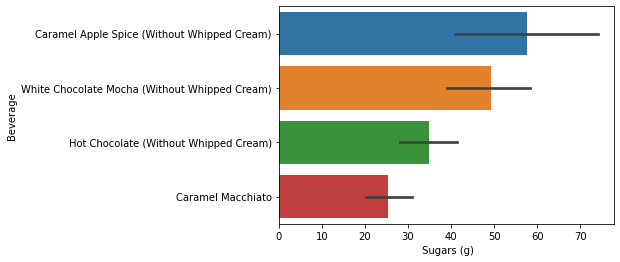

In [20]:
sns.barplot(x= ' Sugars (g)', y= 'Beverage', data= top_high_sugar_drink)

The Caramel Apple Spice (Without Whipped Cream) beverage is the highest drink containing sugar. 


In [21]:
top_high_caf_espresso = drink_menu[['Beverage_category', 'Beverage','Caffeine (mg)']].sort_values(
    'Caffeine (mg)', ascending= False
)
top_high_caf_espresso  = top_high_caf_espresso[top_high_caf_espresso['Beverage_category'] == 'Signature Espresso Drinks']
top_high_caf_espresso.head()

,Beverage_category,Beverage,Caffeine (mg)
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),150
82,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),150
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),150
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),150
68,Signature Espresso Drinks,Caramel Macchiato,150


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

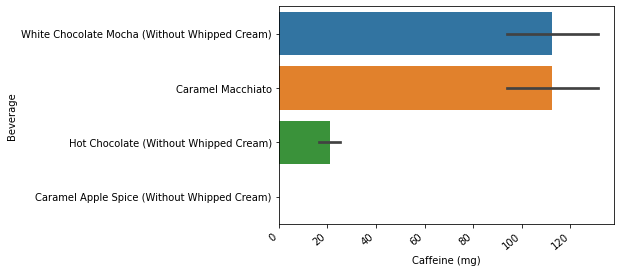

In [22]:
top_high_caf_espresso['Caffeine (mg)'] = top_high_caf_espresso['Caffeine (mg)'].astype(int)

sns.barplot(x= 'Caffeine (mg)', y= 'Beverage', data= top_high_caf_espresso)
plt.xticks(rotation=40, ha='right')

## Let's move on to Tea Drinks

In [23]:
drink_menu['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [24]:
tea_drink = drink_menu[drink_menu['Beverage_category'] == 'Tazo® Tea Drinks'].sort_values('Calories', ascending= False)
tea_drink.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10.0,5.0,0.3,40,230,72,2,71,17.0,25.0,20.0,50.0,6.0,110
129,Tazo® Tea Drinks,Tazo® Green Tea Latte,Soymilk,390,8.0,1.0,0.0,0,180,64,4,58,14.0,20.0,20.0,60.0,30.0,110
127,Tazo® Tea Drinks,Tazo® Green Tea Latte,Venti Nonfat Milk,370,0.5,0.3,0.0,10,200,73,2,71,18.0,30.0,20.0,60.0,6.0,110
125,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,350,8.0,4.0,0.2,30,180,57,1,55,14.0,20.0,15.0,45.0,4.0,80
126,Tazo® Tea Drinks,Tazo® Green Tea Latte,Soymilk,310,6.0,1.0,0.0,0,140,50,3,46,11.0,15.0,15.0,45.0,25.0,80


Text(0.5, 1.0, 'TazoÂ® Tea Drinks Calories')

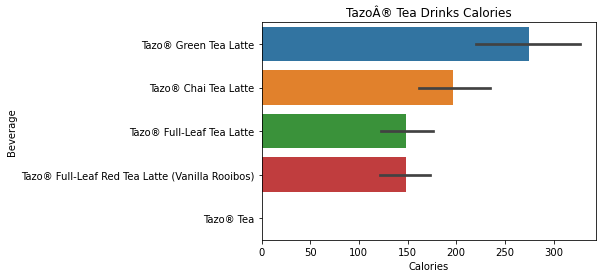

In [25]:
sns.barplot(x= 'Calories', y= 'Beverage', data= tea_drink)
plt.title("TazoÂ® Tea Drinks Calories")

## The tea with the most sugar 

In [26]:
sugar_tea = drink_menu[['Beverage_category', 'Beverage', ' Sugars (g)']].sort_values(
    ' Sugars (g)', ascending= False
)
sugar_tea = sugar_tea[sugar_tea['Beverage_category'] == 'Tazo® Tea Drinks']
sugar_tea.head(10)

,Beverage_category,Beverage,Sugars (g)
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,71
127,Tazo® Tea Drinks,Tazo® Green Tea Latte,71
129,Tazo® Tea Drinks,Tazo® Green Tea Latte,58
124,Tazo® Tea Drinks,Tazo® Green Tea Latte,56
125,Tazo® Tea Drinks,Tazo® Green Tea Latte,55
115,Tazo® Tea Drinks,Tazo® Chai Tea Latte,54
116,Tazo® Tea Drinks,Tazo® Chai Tea Latte,53
117,Tazo® Tea Drinks,Tazo® Chai Tea Latte,46
126,Tazo® Tea Drinks,Tazo® Green Tea Latte,46
112,Tazo® Tea Drinks,Tazo® Chai Tea Latte,43


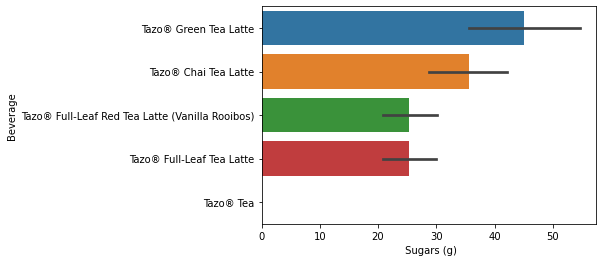

In [27]:
sns.barplot(x= ' Sugars (g)', y= 'Beverage', data= sugar_tea)

In [28]:
caf_tea = drink_menu[['Beverage_category', 'Beverage', 'Caffeine (mg)']].sort_values(
    'Caffeine (mg)', ascending= False
)
caf_tea = caf_tea[caf_tea['Beverage_category'] == 'Tazo® Tea Drinks']
caf_tea['Caffeine (mg)'].unique()


array([120, 110,  95,  80,  70,  55,  50,  25,   0])

In [29]:
caf_tea['Caffeine (mg)'] = caf_tea['Caffeine (mg)'].replace(['varies', 'Varies'], 0)
caf_tea['Caffeine (mg)'] = caf_tea['Caffeine (mg)'].astype(int)

In [30]:
caf_tea = caf_tea.sort_values('Caffeine (mg)', ascending= False)
caf_tea.head()

,Beverage_category,Beverage,Caffeine (mg)
115,Tazo® Tea Drinks,Tazo® Chai Tea Latte,120
116,Tazo® Tea Drinks,Tazo® Chai Tea Latte,120
117,Tazo® Tea Drinks,Tazo® Chai Tea Latte,120
129,Tazo® Tea Drinks,Tazo® Green Tea Latte,110
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,110


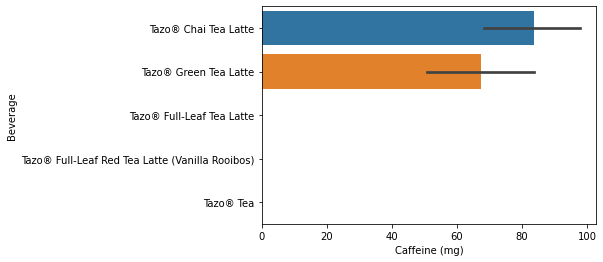

In [31]:
sns.barplot(x= 'Caffeine (mg)', y= 'Beverage', data= caf_tea)

## Let's compare Espresso and Tea drinks

Text(0.5, 1.0, 'Tazo Tea Drinks')

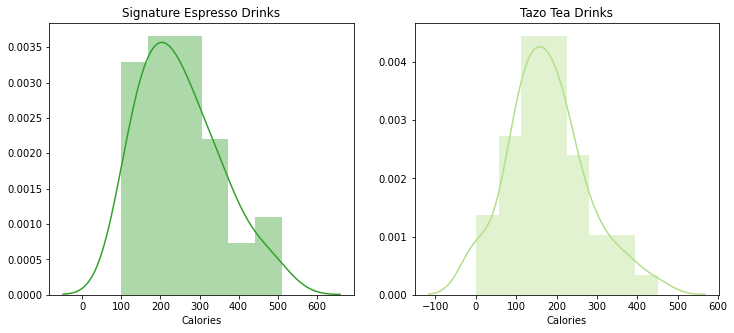

In [32]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(drink_menu['Calories'].loc[drink_menu['Beverage_category'] == 'Signature Espresso Drinks'],
             norm_hist=False, color=sns.color_palette("Paired")[3], ax=ax1)
ax1.set_title('Signature Espresso Drinks')

figure.set_size_inches(12,5)
sns.distplot(drink_menu['Calories'].loc[drink_menu['Beverage_category'] == 'Tazo® Tea Drinks'].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[2], ax=ax2)
ax2.set_title('Tazo Tea Drinks')

The espresso drink have more calories than the tea drinks

Text(0.5, 1.0, 'Tazo Tea Drinks')

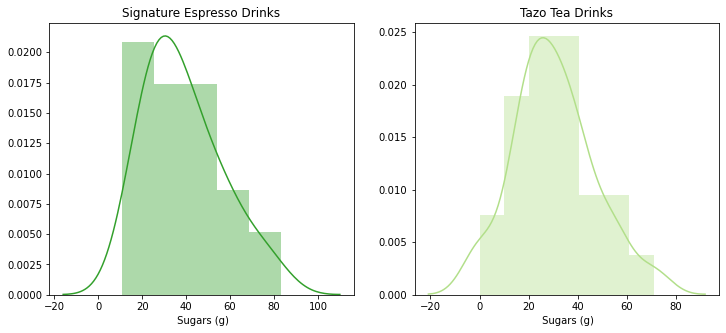

In [33]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(drink_menu[' Sugars (g)'].loc[drink_menu['Beverage_category'] == 'Signature Espresso Drinks'],
             norm_hist=False, color=sns.color_palette("Paired")[3], ax=ax1)
ax1.set_title('Signature Espresso Drinks')

figure.set_size_inches(12,5)
sns.distplot(drink_menu[' Sugars (g)'].loc[drink_menu['Beverage_category'] == 'Tazo® Tea Drinks'].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[2], ax=ax2)
ax2.set_title('Tazo Tea Drinks')

Text(0.5, 1.0, 'Tazo Tea Drinks')

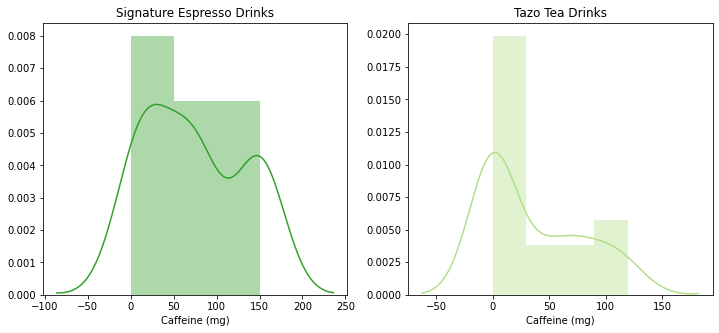

In [34]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(top_high_caf_espresso['Caffeine (mg)'].loc[top_high_caf_espresso['Beverage_category'] == 'Signature Espresso Drinks'],
             norm_hist=False, color=sns.color_palette("Paired")[3], ax=ax1)
ax1.set_title('Signature Espresso Drinks')

figure.set_size_inches(12,5)
sns.distplot(caf_tea['Caffeine (mg)'].loc[caf_tea['Beverage_category'] == 'Tazo® Tea Drinks'].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[2], ax=ax2)
ax2.set_title('Tazo Tea Drinks')

## Let's investigate if there is any correletaion between features

In [35]:
drink_menu.corr()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Calories,1.000000,0.576144,0.642818,0.331047,0.387892,0.795037,0.940034,0.384292,0.909675,0.578453,0.406820,0.215433,0.518720,-0.002109,0.050332
Total Fat (g),0.576144,1.000000,0.732456,0.504675,0.470377,0.429879,0.365694,0.223546,0.332821,0.450749,0.254642,-0.014473,0.521351,0.040624,0.101933
Trans Fat (g),0.642818,0.732456,1.000000,0.694871,0.707794,0.524176,0.439811,0.131267,0.419887,0.496317,0.305293,-0.048238,0.489494,-0.040871,0.187604
Saturated Fat (g),0.331047,0.504675,0.694871,1.000000,0.920077,0.238142,0.161791,-0.093783,0.179255,0.287532,0.251557,-0.043146,0.287097,-0.069603,0.047141
Sodium (mg),0.387892,0.470377,0.707794,0.920077,1.000000,0.290295,0.199477,-0.060154,0.205969,0.496233,0.459001,0.023867,0.462052,-0.098027,0.089527
Total Carbohydrates (g),0.795037,0.429879,0.524176,0.238142,0.290295,1.000000,0.766654,0.173378,0.771407,0.410629,0.311687,0.016623,0.404887,-0.051760,0.186482
Cholesterol (mg),0.940034,0.365694,0.439811,0.161791,0.199477,0.766654,1.000000,0.342040,0.984196,0.360449,0.242821,0.223852,0.263574,-0.027458,-0.022005
Dietary Fibre (g),0.384292,0.223546,0.131267,-0.093783,-0.060154,0.173378,0.342040,1.000000,0.184171,0.540274,0.280673,0.709267,0.147316,0.050077,-0.131485
Sugars (g),0.909675,0.332821,0.419887,0.179255,0.205969,0.771407,0.984196,0.184171,1.000000,0.263061,0.188738,0.118918,0.236040,-0.030816,-0.016856
Protein (g),0.578453,0.450749,0.496317,0.287532,0.496233,0.410629,0.360449,0.540274,0.263061,1.000000,0.799796,0.360997,0.839942,-0.008083,0.100525


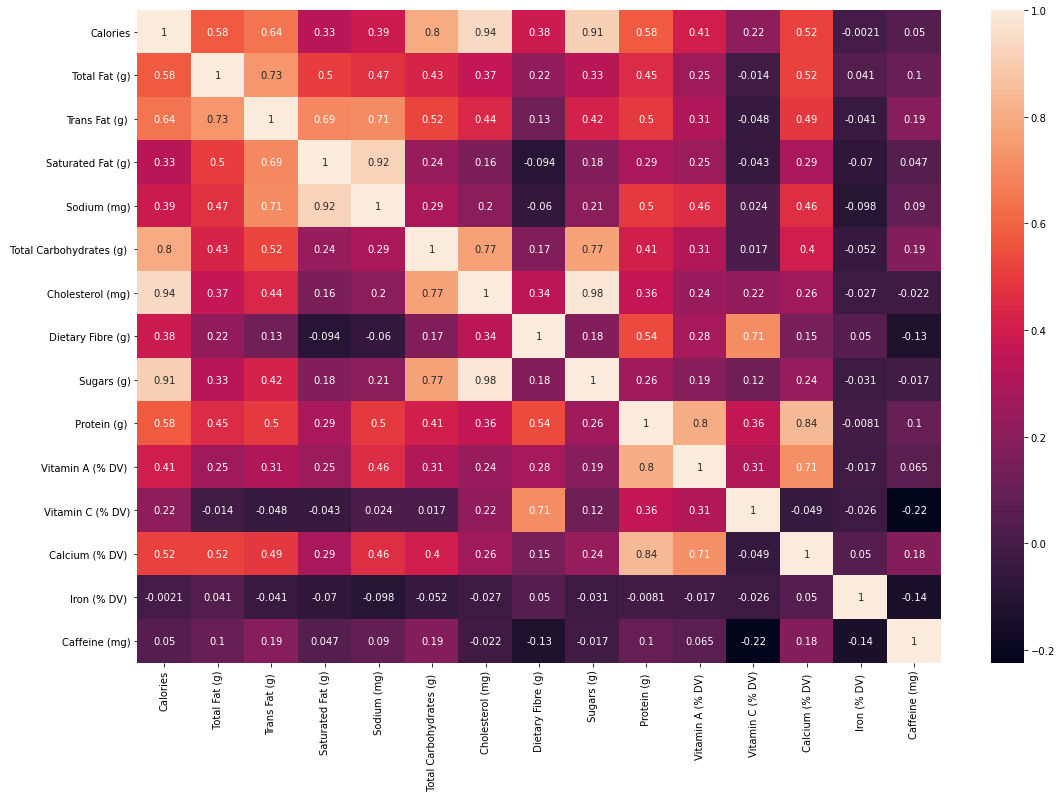

In [36]:
plt.figure(figsize=(18,12))
sns.heatmap(drink_menu.corr(), annot= True)

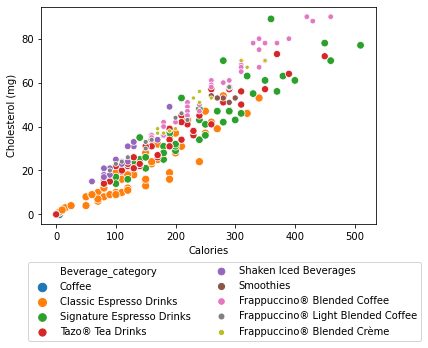

In [37]:
sns.scatterplot(x= 'Calories', y= 'Cholesterol (mg)', hue= 'Beverage_category', size= 'Beverage_category', data= drink_menu)

plt.legend(loc="left", bbox_to_anchor=(1.15, -0.15), ncol= 2)

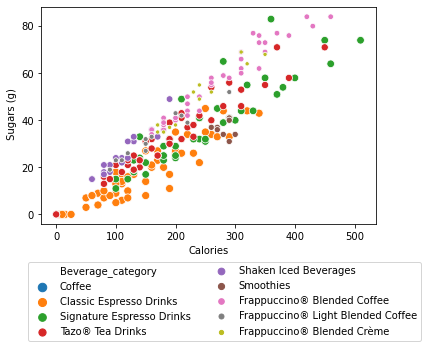

In [38]:
sns.scatterplot(x= 'Calories', y= ' Sugars (g)', hue= 'Beverage_category', size= 'Beverage_category',data= drink_menu)
plt.legend(loc="left", bbox_to_anchor=(1.15, -0.15), ncol= 2)

Conclusion

At the beginning of the study, I wanted to understand the difference between espresso coffee and Tazo tea. It was fascinating to see that tea was lower in calories and sugar than espresso. But if you want a boost in the morning, espresso has more caffeine, but that depends on your caffeine tolerance.  

I also wanted to observe if there any correlation between the information facts. Interestingly, the strongest correlation was between calories and cholesterol with 94%, indicating the higher the calories, the higher the beverage's cholesterol. I notice Signature Espresso drink and Frappuccino Blended Coffee are the highest calories and cholesterol with a scatterplot. Contrary to the classic espresso have lower calories.

The same occurred with calories and sugar, with a 90% of correlation. The scatterplot reflects the same behavior that has calories and cholesterol. 